In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Load the data into a Pandas dataframe
data = pd.read_csv("ef_usa_moves_db.csv")

In [14]:
# Check the size of the dataset
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  198144
Number of columns:  9


In [15]:
# Check the first 5 rows of the data
data.head()

,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type,id_speed
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus,1
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus,2
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus,3
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus,4
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus,5


In [16]:
# Check for missing values in each column
print(data.isnull().sum())

fuel_type               0
reference_year          0
model_year              0
pollutant               0
lower_speed_interval    0
upper_speed_interval    0
ef                      0
source_type             0
id_speed                0
dtype: int64


In [17]:
data= data[data['lower_speed_interval'] <= 68.4]
data

,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type,id_speed
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus,1
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus,2
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus,3
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus,4
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus,5
...,...,...,...,...,...,...,...,...,...
198133,G,2022,2022,VOC,36.2,44.3,0.058130,Transit Bus,6
198134,G,2022,2022,VOC,44.3,52.3,0.053977,Transit Bus,7
198135,G,2022,2022,VOC,52.3,60.4,0.050374,Transit Bus,8
198136,G,2022,2022,VOC,60.4,68.4,0.049005,Transit Bus,9


In [18]:
data.shape

(123840, 9)

In [19]:
data['pollutant'].unique()

array(['CH4', 'CO', 'CO2', 'EC', 'HONO', 'N2O', 'NH3', 'NO', 'NO2', 'NOx',
       'PM10', 'PM25', 'SO2', 'THC', 'TOG', 'VOC', 'NH4', 'NO3'],
      dtype=object)

In [20]:
df_filtered = data[data['pollutant'].isin(['CH4', 'CO', 'CO2', 'EC', 'THC', 'N2O', 'NH3', 'NO', 'NO2', 'NOx'])]
df_filtered1 = data[data['pollutant'].isin(['PM10', 'PM25', 'SO2', 'HONO', 'TOG', 'VOC', 'NH4', 'NO3'])]
#df_filtered = data
#df_filtered = data.groupby('pollutant').mean().sort_values(by='ef', ascending=False).head(10)


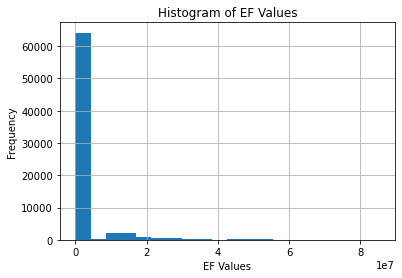

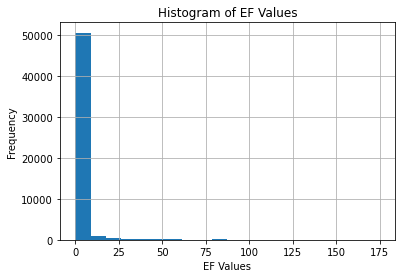

In [21]:

# Select the column with the ef values
ef_values = df_filtered['ef']

# Create a histogram with 20 bins
df_filtered.hist(column='ef', bins=20)

# Set the title and labels for the axes
plt.title('Histogram of EF Values')
plt.xlabel('EF Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()







# Select the column with the ef values
ef_values = df_filtered1['ef']

# Create a histogram with 20 bins
df_filtered1.hist(column='ef', bins=20)

# Set the title and labels for the axes
plt.title('Histogram of EF Values')
plt.xlabel('EF Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [22]:
# Choose a constant value
c = 1

# Add the constant value to the ef column
df_filtered['ef_plus_c'] = df_filtered['ef'] + c

# Apply the natural logarithm function to the ef_plus_c column
df_filtered['log_ef'] = np.log(df_filtered['ef_plus_c'])

# Add the constant value to the ef column
df_filtered1['ef_plus_c'] = df_filtered1['ef'] + c

# Apply the natural logarithm function to the ef_plus_c column
df_filtered1['log_ef'] = np.log(df_filtered1['ef_plus_c'])


# Print the updated DataFrame
df_filtered




,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type,id_speed,ef_plus_c,log_ef
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus,1,70.123508,4.250258
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus,2,42.044210,3.738722
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus,3,29.991626,3.400918
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus,4,25.887222,3.253749
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus,5,22.287275,3.104016
...,...,...,...,...,...,...,...,...,...,...,...
198101,G,2022,2022,THC,36.2,44.3,0.067527,Transit Bus,6,1.067527,0.065345
198102,G,2022,2022,THC,44.3,52.3,0.062704,Transit Bus,7,1.062704,0.060816
198103,G,2022,2022,THC,52.3,60.4,0.058518,Transit Bus,8,1.058518,0.056870
198104,G,2022,2022,THC,60.4,68.4,0.056927,Transit Bus,9,1.056927,0.055366


In [23]:
df_filtered.describe()

,reference_year,model_year,lower_speed_interval,upper_speed_interval,ef,id_speed,ef_plus_c,log_ef
count,71300.000000,71300.000000,71300.000000,71300.000000,7.130000e+04,71300.000000,7.130000e+04,71300.000000
mean,2018.569425,2004.138850,32.600000,40.240000,2.032545e+06,5.500000,2.032546e+06,3.231537
std,2.288720,8.889855,22.514598,23.110731,7.516105e+06,2.872301,7.516105e+06,4.950927
min,2015.000000,1985.000000,0.000000,4.000000,0.000000e+00,1.000000,1.000000e+00,0.000000
25%,2017.000000,1997.000000,12.100000,20.100000,9.169865e-02,3.000000,1.091699e+00,0.087735
50%,2019.000000,2004.000000,32.200000,40.250000,2.121529e+00,5.500000,3.121529e+00,1.138323
75%,2021.000000,2012.000000,52.300000,60.400000,2.488722e+01,8.000000,2.588722e+01,3.253749
max,2022.000000,2022.000000,68.400000,76.400000,8.541058e+07,10.000000,8.541058e+07,18.262981


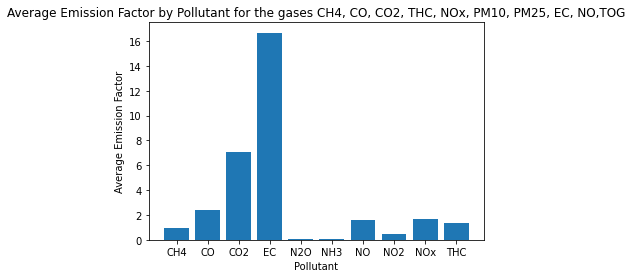

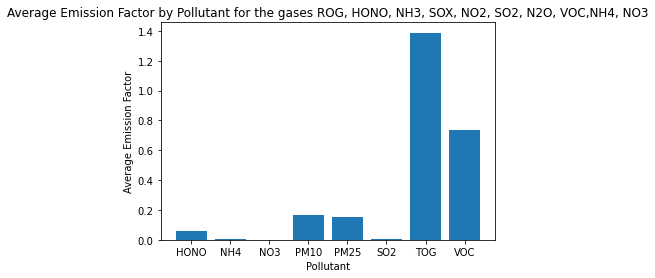

In [24]:
# Calculate average ef for each pollutant
avg_ef_by_pollutant = df_filtered.groupby('pollutant')['log_ef'].mean()

# Create a bar plot of the average ef values
plt.bar(avg_ef_by_pollutant.index, avg_ef_by_pollutant.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Average Emission Factor by Pollutant for the gases CH4, CO, CO2, THC, NOx, PM10, PM25, EC, NO,TOG')

# Show the plot
plt.show()



# Calculate average ef for each pollutant
avg_ef_by_pollutant1 = df_filtered1.groupby('pollutant')['log_ef'].mean()

# Create a bar plot of the average ef values
plt.bar(avg_ef_by_pollutant1.index, avg_ef_by_pollutant1.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Average Emission Factor by Pollutant for the gases ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3')

# Show the plot
plt.show()

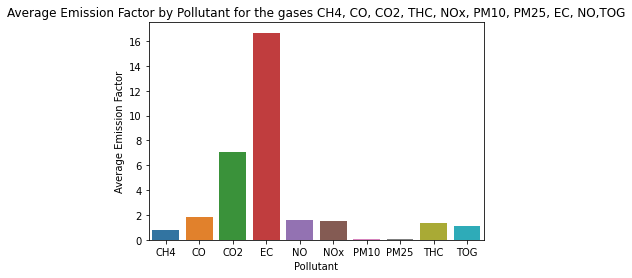

In [18]:
import seaborn as sns
# Calculate average ef for each pollutant
avg_ef_by_pollutant = df_filtered.groupby('pollutant')['log_ef'].mean()

# Create a bar plot of the average ef values
sns.barplot(x=avg_ef_by_pollutant.index, y=avg_ef_by_pollutant.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Average Emission Factor by Pollutant for the gases CH4, CO, CO2, THC, NOx, PM10, PM25, EC, NO,TOG')

# Show the plot
plt.show()

Above is a graph that shows what the correlation is between 10 pollutants and the average emission factor.We have taken the values of those pollutants after applying the log transformation, and these 10 pollutants have emission values greater than 1.

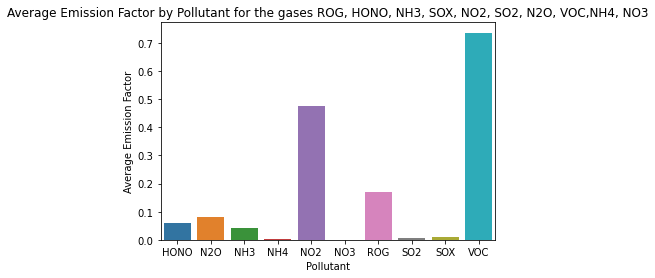

In [16]:
# Calculate average ef for each pollutant
avg_ef_by_pollutant1 = df_filtered1.groupby('pollutant')['log_ef'].mean()

# Create a bar plot of the average ef values
sns.barplot(x=avg_ef_by_pollutant1.index, y=avg_ef_by_pollutant1.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Average Emission Factor by Pollutant for the gases ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3')

# Show the plot
plt.show()

Above graph depicts the correlation between 10 pollutants and the average emission factor.We have taken the values of those pollutants after applying the log transformation, and these 10 pollutants have emission values greater than 1.

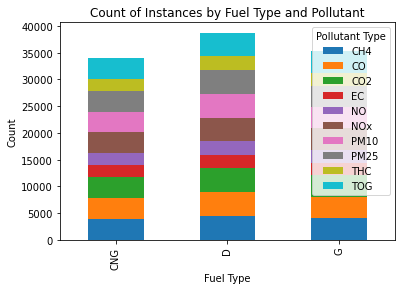

In [215]:
# Group by fuel_type and pollutant, and count the number of instances in each group
grouped_df = df_filtered.groupby(['fuel_type', 'pollutant']).size().reset_index(name='counts')

# Pivot the grouped data to create a multi-level index on fuel_type and pollutant
pivot_df = grouped_df.pivot(index='fuel_type', columns='pollutant', values='counts')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count of Instances by Fuel Type and Pollutant")
plt.legend(title='Pollutant Type')
plt.show()

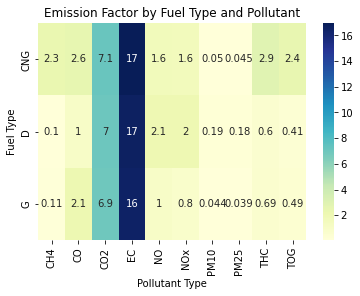

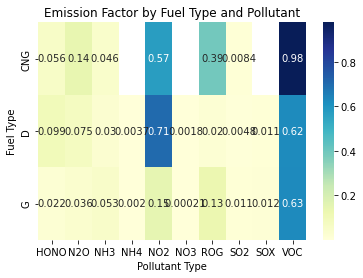

In [216]:
# Group by fuel_type, pollutant, and take the mean of emission factor
grouped_df = df_filtered.groupby(['fuel_type', 'pollutant'], as_index=False).mean()

# Pivot the grouped data to create a multi-level index on fuel_type and pollutant
pivot_df = grouped_df.pivot(index='fuel_type', columns='pollutant', values='log_ef')

# Plot the heatmap
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True)
plt.xlabel("Pollutant Type")
plt.ylabel("Fuel Type")
plt.title("Emission Factor by Fuel Type and Pollutant")
plt.show()





# Group by fuel_type, pollutant, and take the mean of emission factor
grouped_df1 = df_filtered1.groupby(['fuel_type', 'pollutant'], as_index=False).mean()

# Pivot the grouped data to create a multi-level index on fuel_type and pollutant
pivot_df1 = grouped_df1.pivot(index='fuel_type', columns='pollutant', values='log_ef')

# Plot the heatmap
sns.heatmap(pivot_df1, cmap='YlGnBu', annot=True)
plt.xlabel("Pollutant Type")
plt.ylabel("Fuel Type")
plt.title("Emission Factor by Fuel Type and Pollutant")
plt.show()

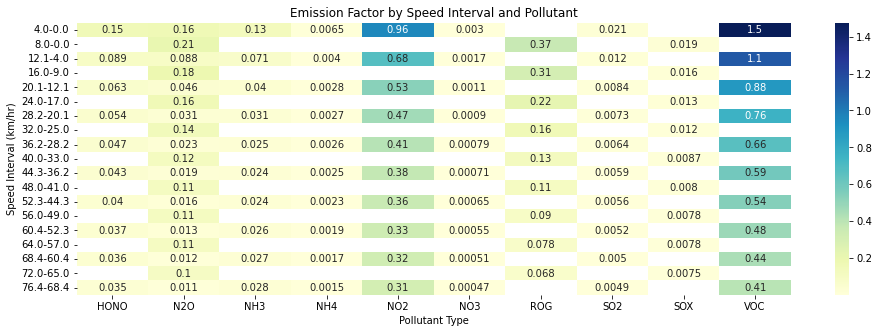

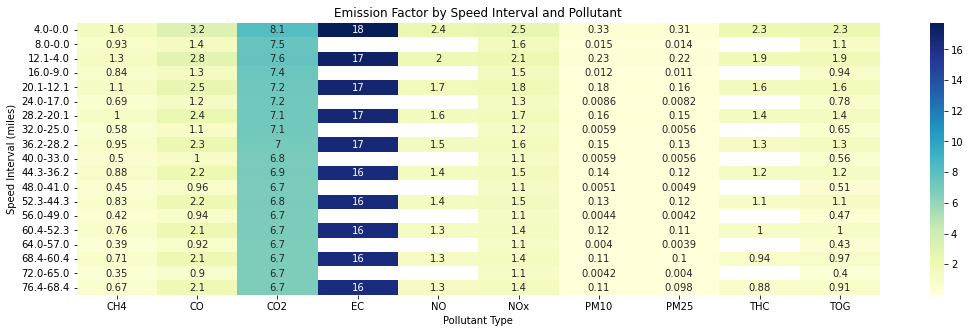

In [236]:

grouped_df1 = df_filtered1.groupby(['upper_speed_interval', 'lower_speed_interval', 'pollutant'], as_index=False).mean()

# Pivot the grouped data to create a multi-level index on upper_speed_interval, lower_speed_interval, and pollutant
pivot_df1 = grouped_df1.pivot(index=['upper_speed_interval', 'lower_speed_interval'], columns='pollutant', values='log_ef')
plt.figure(figsize = (16,5))
# Plot the heatmap
sns.heatmap(pivot_df1, cmap='YlGnBu', annot=True)
plt.xlabel("Pollutant Type")
plt.ylabel("Speed Interval (km/hr)")
plt.title("Emission Factor by Speed Interval and Pollutant")
plt.show()



import matplotlib.pyplot as plt1
grouped_df = df_filtered.groupby(['upper_speed_interval', 'lower_speed_interval', 'pollutant'], as_index=False).mean()

# Pivot the grouped data to create a multi-level index on upper_speed_interval, lower_speed_interval, and pollutant
pivot_df = grouped_df.pivot(index=['upper_speed_interval', 'lower_speed_interval'], columns='pollutant', values='log_ef')
plt1.figure(figsize = (18,5))
# Plot the heatmap
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True)

plt1.xlabel("Pollutant Type")
plt1.ylabel("Speed Interval (miles)")
plt1.title("Emission Factor by Speed Interval and Pollutant")
plt1.show()


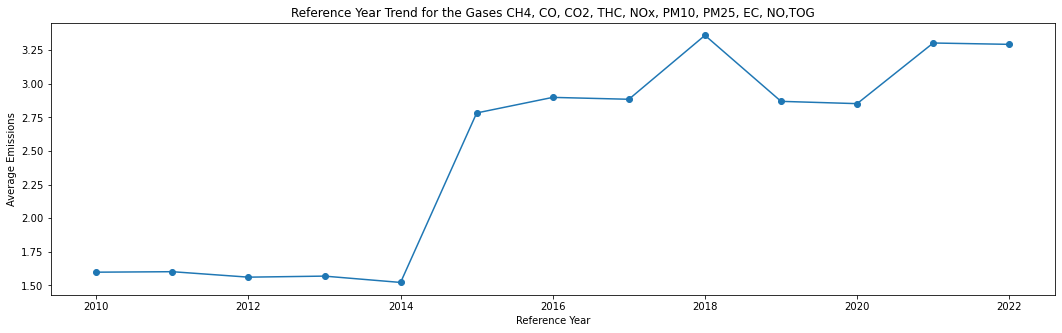

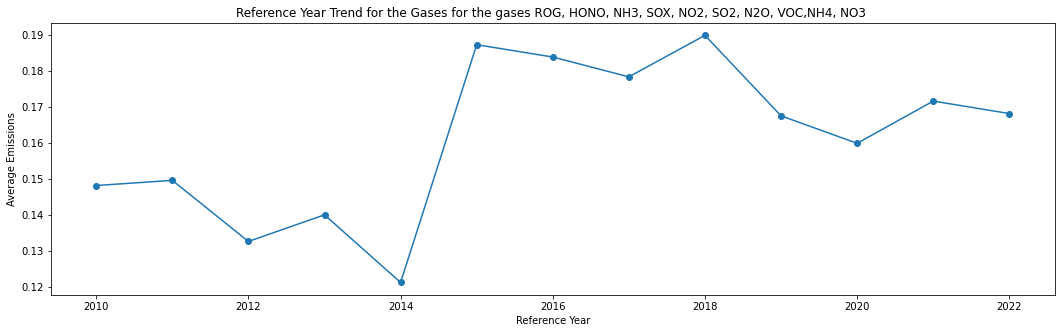

In [258]:
# Group the data by reference year and calculate the average emissions for each year
reference_years = df_filtered.groupby('reference_year').mean()['log_ef']
plt.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(reference_years.index, reference_years.values, '-o')
plt.xlabel('Reference Year')
plt.ylabel('Average Emissions')
plt.title('Reference Year Trend for the Gases CH4, CO, CO2, THC, NOx, PM10, PM25, EC, NO,TOG')
plt.show()




 #Group the data by reference year and calculate the average emissions for each year
reference_years1 = df_filtered1.groupby('reference_year').mean()['log_ef']
plt.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(reference_years1.index, reference_years1.values, '-o')
plt.xlabel('Reference Year')
plt.ylabel('Average Emissions')
plt.title('Reference Year Trend for the Gases for the gases ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3 ')
plt.show()

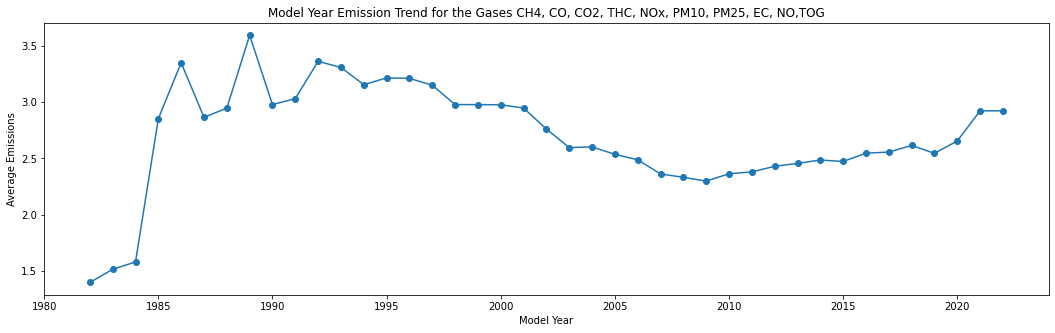

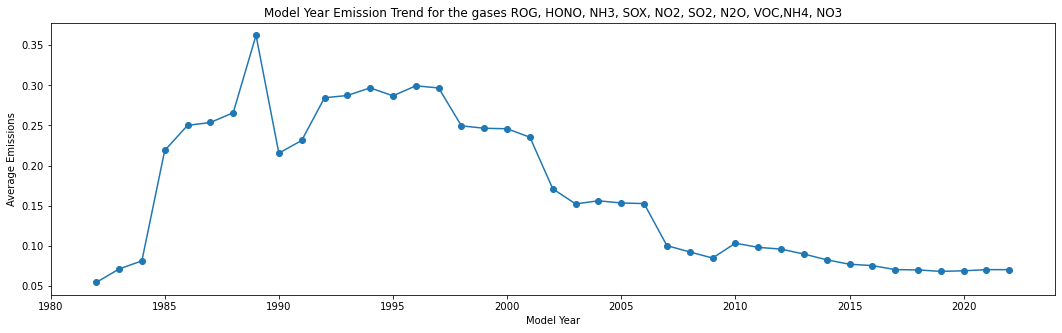

In [259]:
# Group the data by fuel type and calculate the average emissions for fuel type
fuel_type_emission = df_filtered.groupby("model_year").mean()['log_ef']
plt.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(fuel_type_emission.index, fuel_type_emission.values, '-o')
plt.xlabel('Model Year')
plt.ylabel('Average Emissions')
plt.title('Model Year Emission Trend for the Gases CH4, CO, CO2, THC, NOx, PM10, PM25, EC, NO,TOG')
plt.show()




# Group the data by fuel type and calculate the average emissions for fuel type
fuel_type_emission1 = df_filtered1.groupby("model_year").mean()['log_ef']
plt1.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(fuel_type_emission1.index, fuel_type_emission1.values, '-o')
plt.xlabel('Model Year')
plt.ylabel('Average Emissions')
plt.title('Model Year Emission Trend for the gases ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3')
plt.show()

In [220]:
# Create the scatter plot fuel type, Average Speed and Emission Factor
df_filtered['average_speed_interval'] = (df_filtered['lower_speed_interval'] + df_filtered['upper_speed_interval']) / 2






# Create the scatter plot fuel type, Average Speed and Emission Factor
df_filtered1['average_speed_interval'] = (df_filtered1['lower_speed_interval'] + df_filtered1['upper_speed_interval']) / 2


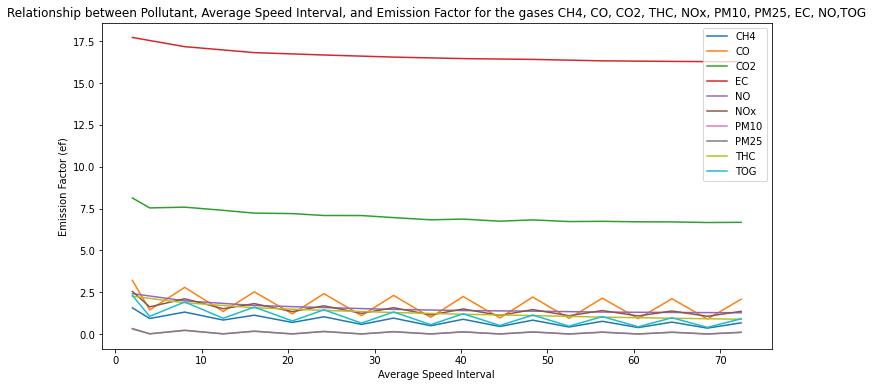

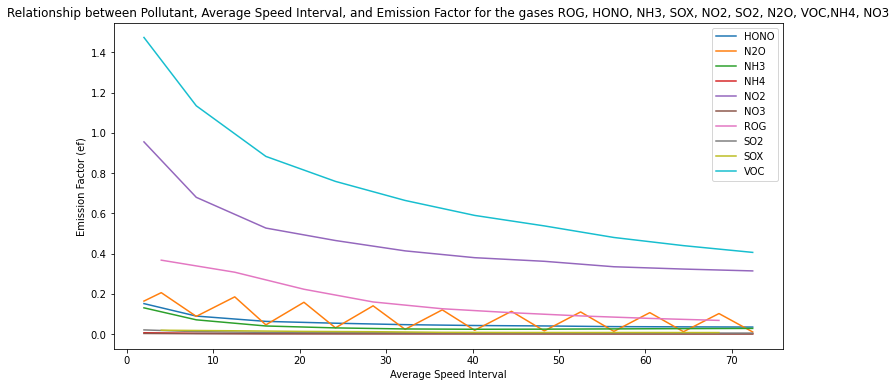

In [260]:
# group the data by pollutant and average speed interval and find the mean of each pollutant at each speed interval
grouped = df_filtered.groupby(['pollutant', 'average_speed_interval']).mean()

# reset the index to get the pollutant and average speed interval as columns
grouped.reset_index(inplace=True)

# plot the relationship between pollutant, average speed interval, and emission factor
plt.figure(figsize=(12,6))
for pollutant in grouped['pollutant'].unique():
    subset = grouped[grouped['pollutant'] == pollutant]
    plt.plot(subset['average_speed_interval'], subset['log_ef'], label=pollutant)

# add labels and title to the plot
plt.xlabel('Average Speed Interval')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant, Average Speed Interval, and Emission Factor for the gases CH4, CO, CO2, THC, NOx, PM10, PM25, EC, NO,TOG')
plt.legend()

# display the plot
plt.show()











# group the data by pollutant and average speed interval and find the mean of each pollutant at each speed interval
grouped1 = df_filtered1.groupby(['pollutant', 'average_speed_interval']).mean()

# reset the index to get the pollutant and average speed interval as columns
grouped1.reset_index(inplace=True)

# plot the relationship between pollutant, average speed interval, and emission factor
plt.figure(figsize=(12,6))
for pollutant in grouped1['pollutant'].unique():
    subset = grouped1[grouped1['pollutant'] == pollutant]
    plt.plot(subset['average_speed_interval'], subset['log_ef'], label=pollutant)

# add labels and title to the plot
plt.xlabel('Average Speed Interval')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant, Average Speed Interval, and Emission Factor for the gases ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3')
plt.legend()

# display the plot
plt.show()

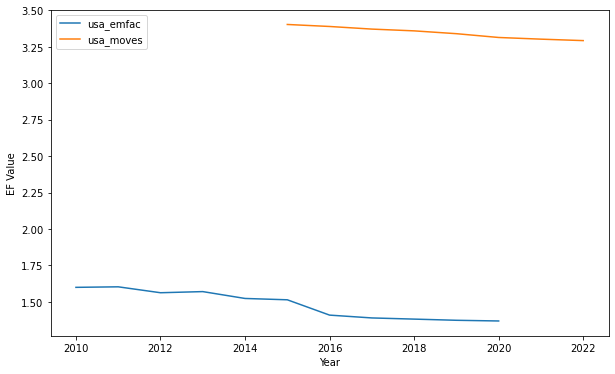

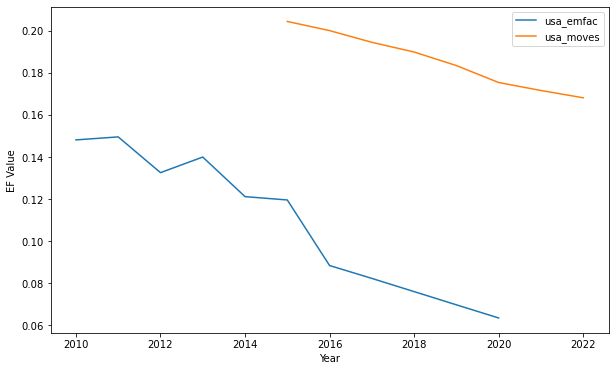

In [248]:
# Group the data by data_from and year, and calculate the mean ef value for each group
grouped = df_filtered.groupby(['data_from', 'reference_year']).mean().reset_index()

# Create a line plot with lines connecting the points for each data_from group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped.groupby('data_from'):
    ax.plot(group['reference_year'], group['log_ef'], label=name)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('EF Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()




# Group the data by data_from and year, and calculate the mean ef value for each group
grouped = df_filtered1.groupby(['data_from', 'reference_year']).mean().reset_index()

# Create a line plot with lines connecting the points for each data_from group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped.groupby('data_from'):
    ax.plot(group['reference_year'], group['log_ef'], label=name)

# Set the x-axis and y-axis labels
ax.set_title('Avg Emission ROG, HONO, NH3, SOX, NO2, SO2, N2O, VOC,NH4, NO3 from 2015 to 2022')
ax.set_xlabel('Year')
ax.set_ylabel('EF Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()